For this Homework 3 I'm looking at a Spongebob_episode.csv to see the correlation analysis that Season number and the affect it may have on U.S. viewership (millions). In the data set, I've provided the dtype, majority of it being objects. However, the Quantitative variables I'll be using for this data set are "U.S. viewers (millions)", "Season N", "Episode N", "Copyright Year", and experimenting with "AirDate". The rest of the columns are qualitative, such as producer names and the character names.

In [1345]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates
import seaborn as sns
from datetime import timedelta
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math 

In [1346]:
df = pd.read_csv("spongebob_episodes.csv")

In [1347]:
df.head()

,Airdate,Animation,Animation Supervisor,Copyright year,Creative,Episode №,Guest(s),Line Producer,Main,Next,...,Storyboard,Storyboard Artist(s),Supervising,Supervising Producer(s),Technical,U.S. premiere time (ET),U.S. viewers (millions),Writer(s),characters,title
0,1997/1998,Alan Smart,NaN,"['1997 (1997 version)', '1999 (1999 version)']",Derek Drymon (uncredited),1a,NaN,NaN,NaN,"""Reef Blower""",...,Stephen Hillenburg,Derek Drymon,NaN,NaN,NaN,9:30 pm,2.96,"['Stephen Hillenburg', 'Derek Drymon', 'Tim Hi...","French Narrator, Sea urchins, SpongeBob Square...",Help Wanted
1,"May 1, 1999","['Fred Miller', 'Tom Yasumi (uncredited)']",NaN,1999,Derek Drymon (uncredited),1b,NaN,NaN,NaN,"""Tea at the Treedome""",...,Paul Tibbitt (uncredited),Jay Lender (uncredited),NaN,NaN,NaN,9:38 pm,2.96,"['Stephen Hillenburg', 'Derek Drymon', 'Tim Hi...","SpongeBob SquarePants, Squidward Tentacles, Re...",Reef Blower
2,"May 1, 1999",Tom Yasumi,NaN,1999,Derek Drymon,1c,NaN,NaN,NaN,"""Bubblestand""",...,Paul Tibbitt,Mark O'Hare,NaN,NaN,NaN,9:45 pm,2.96,"['Peter Burns', 'Doug Lawrence', 'Paul Tibbitt']","SpongeBob SquarePants, Jellyfish, Lavender jel...",Tea at the Treedome
3,"July 17, 1999",Tom Yasumi,NaN,1999,Derek Drymon,2a,NaN,NaN,NaN,"""Ripped Pants""",...,Ennio Torresan,Erik Wiese,NaN,NaN,NaN,10:00 am,2.51,"['Ennio Torresan', 'Erik Wiese', 'Stephen Hill...","SpongeBob SquarePants, Scallop, Squidward Tent...",Bubblestand
4,"July 17, 1999",Edgar Larrazábal,NaN,1999,Derek Drymon,2b,Jay Lender as Chef (uncredited),NaN,NaN,"""Jellyfishing""",...,Paul Tibbitt,Mark O'Hare,NaN,NaN,NaN,10:15 am,2.51,"['Paul Tibbitt', 'Peter Burns']","French Narrator, SpongeBob SquarePants, Sponge...",Ripped Pants


In [1348]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Airdate                  583 non-null    object
 1   Animation                569 non-null    object
 2   Animation Supervisor     2 non-null      object
 3   Copyright year           583 non-null    object
 4   Creative                 329 non-null    object
 5   Episode №                583 non-null    object
 6   Guest(s)                 190 non-null    object
 7   Line Producer            68 non-null     object
 8   Main                     21 non-null     object
 9   Next                     583 non-null    object
 10  Previous                 582 non-null    object
 11  Production code          583 non-null    object
 12  Running time             583 non-null    object
 13  Season №                 583 non-null    int64 
 14  Sister episode(s)        552 non-null    o

"AirDate" and "U.S. viewers (millions)" are both object datatypes, due to this when trying to find the linear regression for a dataset it takes in numeric datatypes. 

"AirDate" also has two different formats of the date one being "1997/1998" and others being "May 1,1999" Just changing these and formatting them into datetime functions so they all have the same layout and so the datatype is numeric. 

"U.S. viewers (millions)" just has a datatype of object so I'll just convert it to numeric using pandas library 

In [1349]:
#Parsing Airdate and U.S. viewers due to it being an object 
df['Airdate'] = pd.to_datetime(df['Airdate'], errors = "coerce") 
df['Airdate_num'] = mdates.date2num(df['Airdate'])
df["U.S. viewers (millions)"]= pd.to_numeric(df["U.S. viewers (millions)"], errors = "coerce")
#removing any NaT from datasets
df_clean = df.dropna(subset=['Airdate_num', 'U.S. viewers (millions)'])

/var/folders/5g/2ch17nb94z7_9y4f5xs6mrsh0000gn/T/ipykernel_34559/1035067680.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Airdate'] = pd.to_datetime(df['Airdate'], errors = "coerce")


In [1350]:
df.describe()

,Airdate,Season №,U.S. viewers (millions),Airdate_num
count,582,583.000000,559.000000,582.000000
mean,2011-11-11 06:16:04.948453632,7.488851,2.775403,15289.261168
min,1999-05-01 00:00:00,1.000000,0.080000,10712.000000
25%,2006-11-22 00:00:00,4.000000,1.600000,13474.000000
50%,2011-02-17 12:00:00,7.000000,2.800000,15022.500000
75%,2018-04-03 12:00:00,11.000000,3.875000,17624.500000
max,2024-10-29 00:00:00,14.000000,8.560000,20025.000000
std,NaN,3.898999,1.598856,2706.935778


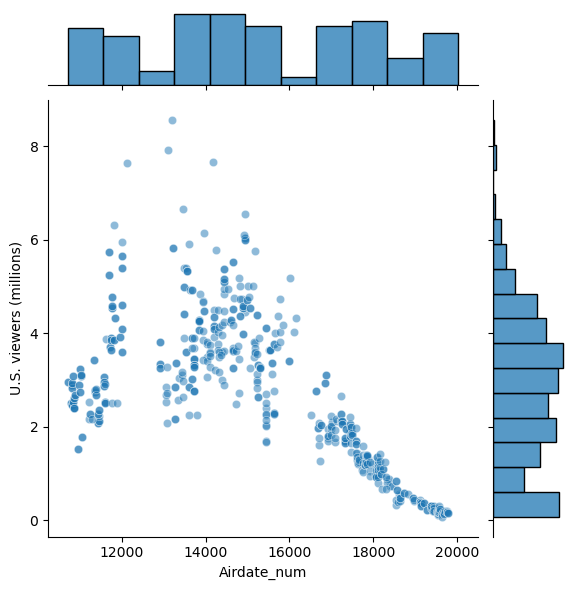

In [1351]:
#Exploratory Data Analysis

#takes variables that's going to be plot on x and y (predictor) axis
#Predictor is Airdate, I'm trying to see how the viewership changes overtime
#Passing in an Alpha argument, so that each point alpha opacity of 0.5
#Makes it easier to visulize where the majority of the points lie 
sns.jointplot(x="Airdate_num", y="U.S. viewers (millions)", data=df, alpha = 0.5)

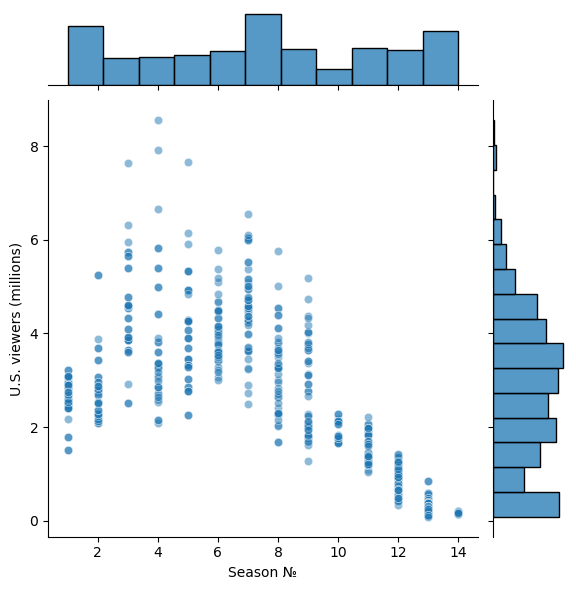

In [1352]:
sns.jointplot(x="Season №", y = "U.S. viewers (millions)", data = df, alpha = 0.5)

/Users/jen/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


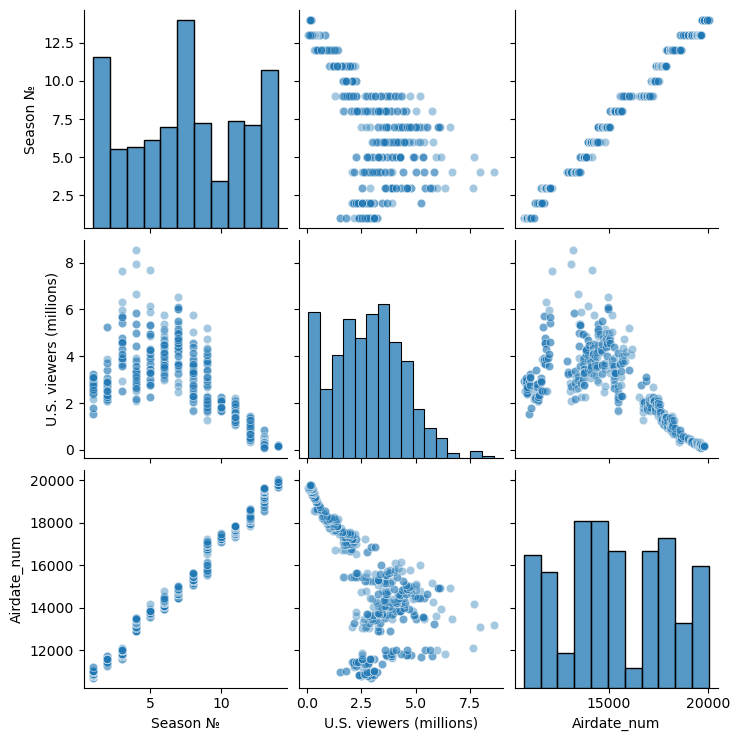

In [1353]:
#Pairplot this compares multiple variables at the same time b
sns.pairplot(df, kind="scatter", plot_kws={"alpha":0.4})

/Users/jen/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


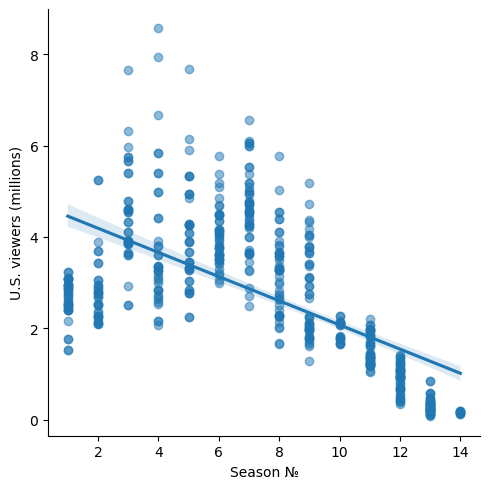

In [1354]:
#Linear Model Plot (for easier visulization)
#I'm going to use the previous datasets to see if the reltionship between the U.S. viewers is affected by the season num
sns.lmplot(x = "Season №", y = "U.S. viewers (millions)", data = df, scatter_kws = {"alpha": 0.5})

/Users/jen/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


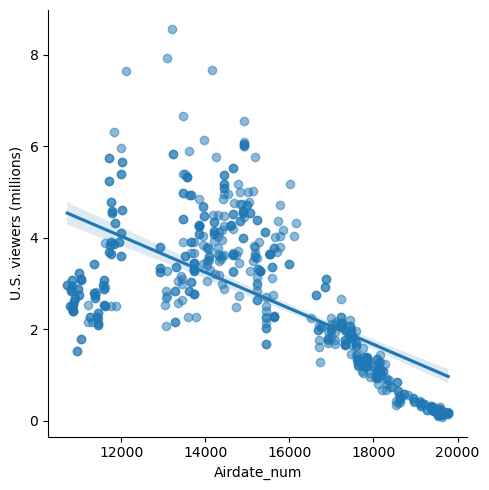

In [1355]:
#Same Linear Model Plot, but this is with the AirDate time 
sns.lmplot(x = "Airdate_num", y = "U.S. viewers (millions)", data = df, scatter_kws = {"alpha": 0.5})


On the Y-axis we can see that the formatting for the date is some weird thousands number, making the graph unable to be easily read. Instead of date, I'm just going to be using Season number as it also affects the amount of viewership. The column of Season number is easier to work with, and there isn't any formatting errors that need to be changed. 

<Axes: xlabel='U.S. viewers (millions)'>

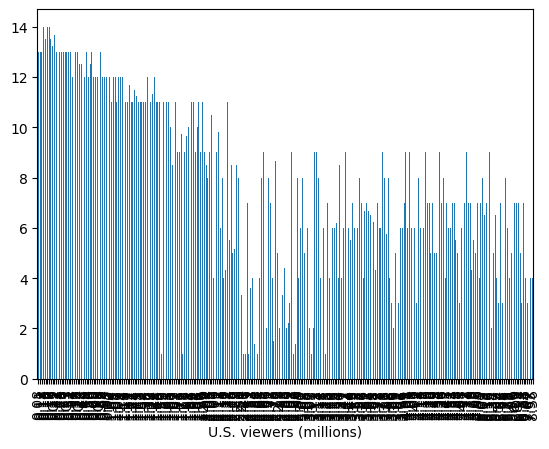

In [1356]:
#I'm going to test why there is a negative trend 
#My predictions: too many outliers, or a data imbalance with there being fewer episodes 
#in the earlier seasons with more viewership and more episodes in the later seasons with less viewership

#This should show the average of viewership overtime per season 
df.groupby("U.S. viewers (millions)")["Season №"].mean().plot(kind = "bar")


<Axes: xlabel='Season №', ylabel='U.S. viewers (millions)'>

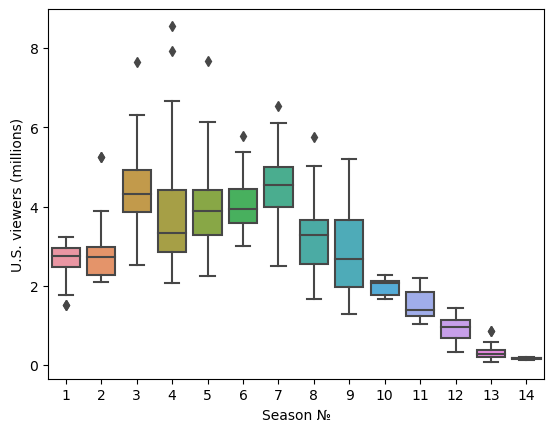

In [1357]:
#checking for outliers 
sns.boxplot(x = "Season №", y = "U.S. viewers (millions)", data = df)

Theres quite a bit of outliers when it comes to viewing the data between Season Number and U.S. viewership, this affects the decreasing in satistical power, bias estimating, the line regession assumtion which can some from the skewed results 

(100.0, 170.0)

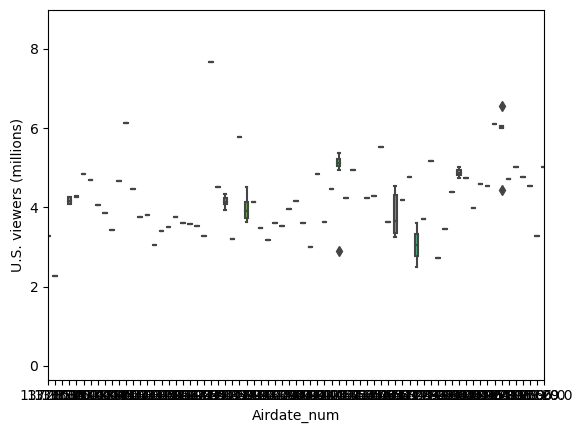

In [1358]:
sns.boxplot(x = "Airdate_num", y = "U.S. viewers (millions)", width = 0.5, data = df)
plt.xlim(100,170)

Once again here I tried testing one last time for outliers with two observations Airdate and U.S. viewers. Due to the vast amount of observations the x-axis has become clustered and there is a lot of outliers that I'm working with compared to just the observations Season number and U.S. viewership. The amount of outliers affects the data and skewes the linear regression line, resulting in a bias (this affects the true parameter). 

In [1359]:
#Creating a function that is going to predict the viewership is affected by season number 

#predictor variables
df['Episode №'] = df['Episode №'].str.extract("(\d+)").astype(int)
df['Copyright year'] = pd.to_numeric(df['Copyright year'], errors = "coerce")

X = df[["Episode №", "Copyright year", "Season №"]]
y = df['U.S. viewers (millions)']


In [1360]:
#Training and test data sets
#random_state (reproducing same random split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [1361]:
#Training the model 
ln = LinearRegression()

#fitting the data into the model 
#given the x it should return the y 
X_train_filled = X_train.fillna(X_train.mean()) #Seemes to be too missing Nan vales I just filled them in with a placeholder
y_train_filled = y_train.fillna(y_train.mean())
ln.fit(X_train_filled, y_train_filled)

LinearRegression()

In [1362]:
#finding the linear coefficients (multi linear regression)
#decrease in coefficient is the inverse relationship between independent and dependent variables
#as independent increases dependent decreases 
ln.coef_

array([-0.03295896, -0.08423772,  0.65236552])

In [1363]:
#seeing the impact of these variables on the predictor 
cdf = pd.DataFrame(ln.coef_, X.columns, columns = ["Coef"])
print(cdf)

                    Coef
Episode №      -0.032959
Copyright year -0.084238
Season №        0.652366


In [1364]:
#Predictions
X_test_filled = X_test.fillna(X_test.mean())
y_test_filled = y_test.fillna(y_test.mean())
predictions = ln.predict(X_test_filled)
predictions
#returns an array where the target column depends on the X values 

array([2.42983698, 1.85535977, 4.17370949, 1.95423664, 2.92689009,
       2.42983698, 3.72692324, 1.5743802 , 3.64683038, 1.44254438,
       0.99990299, 3.0452879 , 2.69617739, 3.39098425, 2.27701259,
       2.44180737, 3.03359249, 3.85875907, 1.07364643, 3.42394321,
       2.76209531, 3.5306456 , 4.52060697, 0.80214925, 2.19129876,
       3.98276937, 4.19884292, 0.90885165, 2.52871385, 4.05918157,
       3.81945069, 2.24405363, 4.30554532, 3.37367634, 4.30554532,
       2.60512605, 3.05872592, 3.43959426, 1.69839051, 0.93398508,
       2.16248467, 3.5306456 , 3.52282008, 4.38877114, 2.21109467,
       3.49768665, 4.45468905, 1.60733916, 1.47550333, 3.09168488,
       3.89171802, 3.77185259, 3.81797458, 3.52282008, 3.72839935,
       3.20105603, 0.93398508, 1.86318529, 1.5743802 , 1.92910321,
       3.75205667, 2.90175666, 2.99280801, 4.05918157, 3.81797458,
       2.32313458, 3.37367634, 1.40958542, 2.13735123, 3.81014906,
       3.41611768, 1.09877987, 3.8377705 , 4.33850427, 1.91345

Text(0.5, 0, 'Predictions')

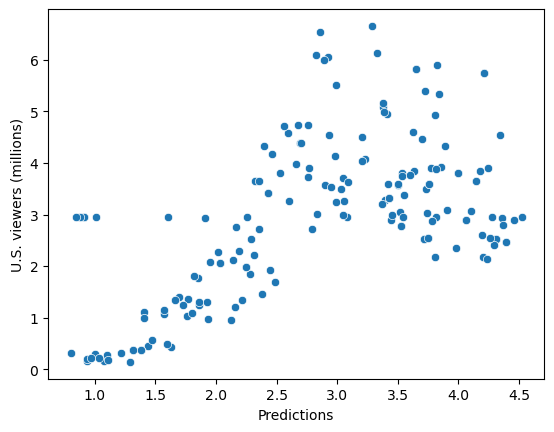

In [1365]:
#Creating Scatter plot to see the actual values (is there some sort of straight line? (1:1 relationship/accurate relationship))
sns.scatterplot(x = predictions, y = y_test_filled)
plt.xlabel("Predictions")

In [1366]:
#Tells us the average absolute error between predicted and actual values 
print("Mean Absolute Error: ", mean_absolute_error(y_test_filled, predictions))
#Tells us the measure of how close a regression line is to the set of data points
print("Mean Square Error: ", mean_squared_error(y_test_filled, predictions))
#Tells us the measurement average difference between values predicted by the model vs actual values
print("RMSE: ", math.sqrt(mean_squared_error(y_test_filled, predictions)))

Mean Absolute Error:  0.9859615976567024
Mean Square Error:  1.5452801431301155
RMSE:  1.243092974451274


In [1367]:
#RSS and RSE
RSS = np.sum((y_test_filled - predictions) ** 2)

n_predictors = X.shape[1]
n_samples = len(y_test_filled)
RSE = np.sqrt(RSS/ (n_samples - n_predictors))

print("RSS: ", RSS)
print("RSE: ", RSE)

RSS:  270.4240250477702
RSE:  1.253887037881047


/Users/jen/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


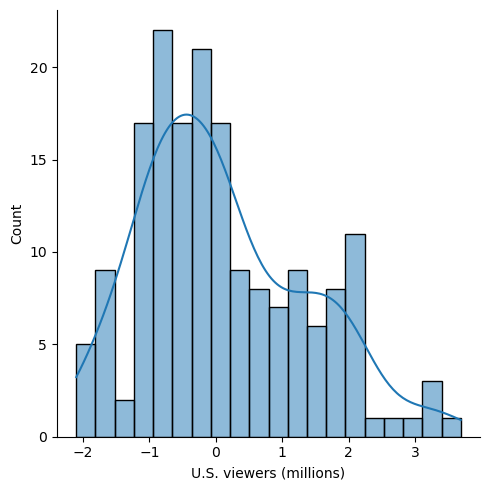

In [1368]:
#Residuals (distance between model predctions vs true model)
residuals = y_test_filled - predictions 
sns.displot(residuals, bins = 20, kde = True)

Question 1: My RSS is predicted to be 270.42, that means that the total squared deviation of the predicted viewership from the actual viewership is 270.42 or that there is a total of 270.42 unexplained variances in my dataset. My RSE of 1.25 million, my model's predictions of the viewership deviate from the actual values by about 1.25 milllion viewers. I can also further see how the model is predicted by the actual viwership when using the RSE, given by the formula the square root of RSS/(n-p). When comparing models and looking for RSS and RSE values having lower RSS and RSE indicate a better predictive accuracy. Millions may sound like a lot for this dataset, but, because the viewership is in the millions an RSE od 1.25 represents a relatively small error when looking at the dataset. This suggests that the model is performing well in capturing trends in the viewership.  

Question 2: My MAE is 0.986, which means that on average my model's prediction is off by about 986,000 viwers. There seems to be quite a signigicant average error in my prediction, this could be due to how I parsed the dataset, and for some reason choosing copyright year isn't the best predictive variable when looking at the viewership. This could've caused a skew in my data, but it just takes more parsing and data clearing/adjusting to fix the MAE. My MSE is 1.545 million views, which means on average the squared differences between the actual and predicted values is 1.5 million. Due to my MSE being larger than my MAE this means that there is a signigicantly high discrepancies in my predictions. Choosing the correct predictions and how it can correlate to the U.S. viewership I've found to be very important, so having a predictor that doesn't really need to be tested has defiently changed and skewed the data. Finally, my RMSE provides a measurment of how well my model is performing, in terms of predicting the viewership. my RMSE is about 1.243 million viewers and this suggests that on average my perdictions are being deprved this much from the actual viwership amount. For me, I would consider these errors to be too high for my liking in my dataset, given that the viewership is already in the millions. but being off by about 986,000 in a 1 million viewership can change my data significantly and make it baised. 

Question 3: Simple models like linear regression can be seen as straight foward. The readability such as seeing data points, the regression line, if there's enough observations, or if theres too many outliers, can be easily ready through this simple model. And using a linear regression is very beneficial when explaining data to a group of people who might not be able to understand the dataset. However, throughout this homework I've come to realize the complexity of working with linear regression models. First off linear regression relies on several assumptions: the relationship between the independent and dependent variables, if it's non linear it's difficult to capture the underlying patterns. In my dataset I've realized this problem when using "Copyright year", the relationship with the "U.S. viwership" isn't impacted byt copyright year, so when I included it in my dataset, there's some underlying patters that the linear model didn't pick up, resulting is a signifigant MAE. Observations should also be independent with one another, so in a time series or data with clustering the assumtion won't hold. This can also be seen in my dataset when I tried to change the dtype objects to int, there could've been an error when converting wither creating too many NaT which I filled up with a filler variable. The vast amount of episodes being produced in one season and episode numbers created a cluster in variable numbers. The normality of the residuals should be normally distributed for valid hypothesis testing, and in the final histogram, we can see that there is a tilt at the beginning of the graph. I'm assuming this is due to the predicted variables I chose, and the residual errors that were presented. Over fitting and Underfitting are also important when it comes to Linear Regression, however, if there is too much data (noise) it can create a complex linear regression, adding in too many predictors. Also underfitting, where there isn't enough predictors to make a prediction for the true value. I would say with my dataset, there was quite a few outliers, and I would say one its due to vast amount of datapoints, and the scaling of my features which is also important when it comes to Linear regression. There's much more when it comes to Linear regession and things that need to be considered such as the evalution of the metrics, moel selection, interpretation of the coefficients, and multicllinearity. But these are just some things I've seen when working with my dataset and the challenges I was faced with. 

Question 4: There is plenty of testing to see if your linear regression model is a "good fit" or a "bad fit" but the ones I tested in this homework was comparing MSE, MAE, and RMSE, and also looking cross-validation. Lower values indicate a better fit when it comes to MSE, MAE, and RMSE depending on what you're trying to achive in your dataset. For example, if you're looking for these factors in a tempature but your MSE is 200 there is a hige error or "bad fit" in your dataset. While my dataset viewership was in the millions I wasn't too happy seeing the MSE being about 986,000, this just means that I have to go through my data more throughly. Cross validation can also determine if the linear regression is a "good" or "bad" fit" this is just splitting the data into traning and test sets multiple times to evaulate the model's performace, if the performace is consident through multiple subsets of data it's a good fit. 

sources: 
https://www.youtube.com/watch?v=O2Cw82YR5Bo (very helpful understanding how to plot linear regression and step by step and understanding termonoligy and how it affects my data)

https://www.geeksforgeeks.org/linear-regression-python-implementation/

https://stats.stackexchange.com/questions/105959/best-way-to-turn-a-date-into-a-numerical-feature

https://www.geeksforgeeks.org/finding-the-outlier-points-from-matplotlib/

https://stackoverflow.com/questions/39173813/pandas-convert-dtype-object-to-int

https://www.geeksforgeeks.org/how-to-calculate-residual-sum-of-squares-in-python/

